<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Logistic_Regression_Titanic_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an interpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [1]:
import pandas as pd # import pandas library

In [2]:
# read in data with pd.read_csv
train = pd.read_csv('https://raw.githubusercontent.com/XiaonaZhou/data_analytics_2/main/Python/Unit_4/titanic_train.csv')

In [3]:
# show first 5 rows of dataset 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [4]:
# import seaborn library
import seaborn as sns

In [5]:
# plot will be shown inside the file
%matplotlib inline 
import matplotlib.pyplot as plt # import plotting library

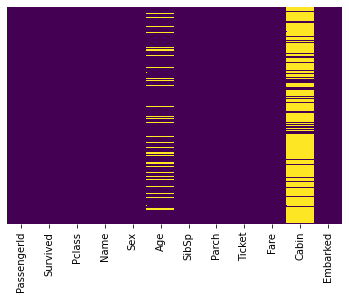

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') # check which columns have missing values

Interpretation: there are many missing values in `Cabin`. there are some missing values in `Age`. 

## Class


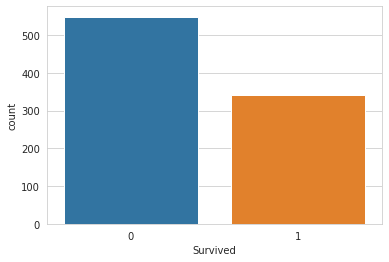

In [ ]:
sns.set_style('whitegrid') # style set up
sns.countplot(x='Survived', data=train) # make a countplot 

Interpretation: there are more people dead than survived. 

## Survived

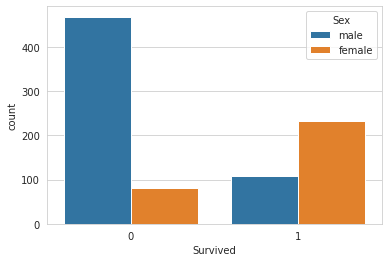

In [ ]:
sns.set_style('whitegrid') # style set up
sns.countplot(x='Survived', hue='Sex', data=train) # make a countplot  and colored by sex

Interpretation: Among the people who died, there are many more males than females. Among the people who survived, there are more females than males.  

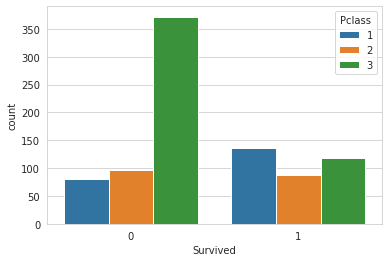

In [ ]:
sns.set_style('whitegrid') # style set up
sns.countplot(x='Survived', hue='Pclass', data=train) # make a countplot  and colored by Pclass

Interpretation: Among the people who died, the total number of death in each class increases as class rank increases.  Among the people who survived, there are more people from the first and third classes. 

## Age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


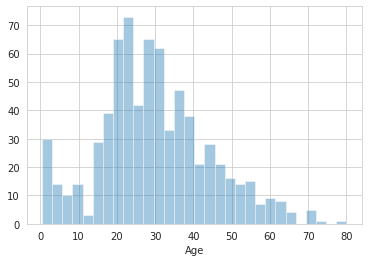

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30) # make a frequency distribution plot without NA values, bins was set to 30

Interpretation: The majority of the passengers are between 20-40 of age

## Siblings

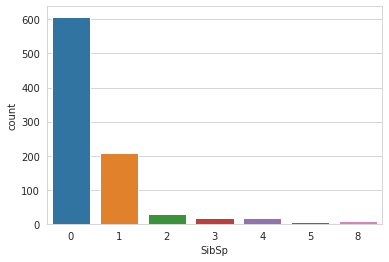

In [ ]:
sns.countplot(x='SibSp',data=train) # make a countplot with sibling/spouse column

Interpretation: The majority of the passengers do not have siblings or spouses on board with them.

# Data Cleaning and Data Pre - Processing

In [ ]:
train.drop('Cabin', axis=1, inplace= True) # drop column Cabin since there are too many NA values

In [ ]:
train.dropna(inplace=True) # drop all the rows that contains NA values

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True) # convert column sex into numerical values
embark = pd.get_dummies(train['Embarked'], drop_first=True) # convert column Embarked into numerical values

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True) # drop the columns that are not numeric

In [ ]:
train.head() # show the first 5 rows

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embark],axis=1) # combine numerical version of columns sex and embarked with the data set 

In [ ]:
train.head() # show the first 5 rows

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model building

In [ ]:
from sklearn.model_selection import  train_test_split # import library

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101)  # split the data into training and testing sets

In [ ]:
from sklearn.linear_model import LogisticRegression # import library for logistic regression 

In [ ]:
logmodel = LogisticRegression() # set up logistic regression model

In [ ]:
logmodel.fit(X_train, y_train) # fit the model with training set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = logmodel.predict(X_test) # make prediction on test set

## Classification report

In [ ]:
from sklearn.metrics import classification_report # import library 

In [ ]:
print(classification_report(y_test,predict)) # get the report of our model, contains scores 

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       128
           1       0.64      0.53      0.58        86

    accuracy                           0.69       214
   macro avg       0.68      0.67      0.67       214
weighted avg       0.69      0.69      0.69       214



From the table above, we see that precision score = 0.69, recall score = 0.67, f1-score = 0.69. 

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix # import library
print(confusion_matrix(y_test, predict)) # get confusion matrix

[[102  26]
 [ 40  46]]


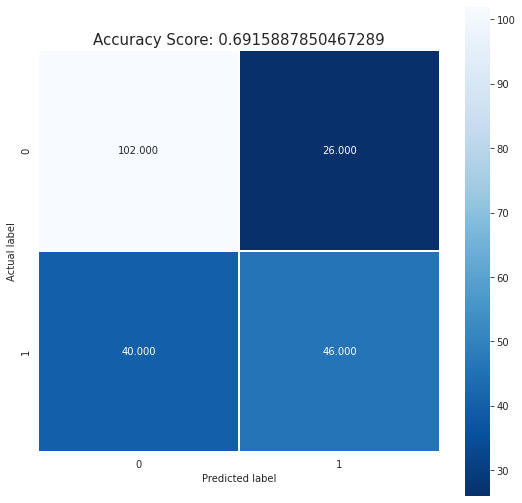

In [ ]:
plt.figure(figsize=(9,9)) # set plot size
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # visualize confusion matrix
plt.ylabel('Actual label'); # labeling 
plt.xlabel('Predicted label'); # labeling 
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test)) # set a value to be display on the title
plt.title(all_sample_title, size = 15); # add title

From the confusion matrix above, we know that TN = 102, TP = 46, FP = 26, FN = 40. 

In [ ]:
from sklearn import  metrics # import library

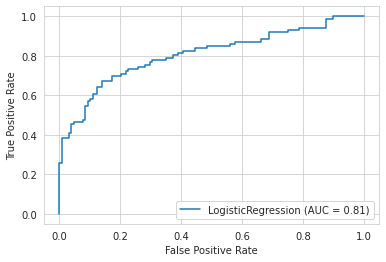

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  # show ROC plot

This is how the ROC curve is interpreted: 

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.[LINK](https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/#:~:text=The%20ROC%20curve%20shows%20the,corner%20indicate%20a%20better%20performance.&text=The%20closer%20the%20curve%20comes,the%20less%20accurate%20the%20test.)

Since the curve is above the diagonal, we say that the model is doing a decent job.


# Conclusion

1. Females are more likely to survive than males
2. People from the higher class are more likely to survive than the lower ones. 
3. The majority of the passengers are between 20-40 of age.
4. Very few passengers brought their relatives with them.
5. Logistic model may not be the best method for this dataset. The scores are around 0.7. We should try other ML models with this dataset and see if we can get better results. 